### Imports

In [1]:
import pandas as pd

%matplotlib inline

### Functions

In [20]:
def new_joined_df_cretor(df,symbols):
    date_min = df["date"].min()
    date_max = df["date"].max()
    dates = pd.date_range(date_min, date_max)
    close_prices = pd.DataFrame(index=dates)
    
    for symbol in symbols:
        
        df_sym = df[df["Name"]==symbol]
        df_temp = pd.DataFrame(data=df_sym["close"].to_numpy(), index=df_sym["date"], columns=[symbol])
        close_prices = close_prices.join(df_temp) # default: left join
#         print(close_prices)
    return close_prices

### Read data

In [21]:
df = pd.read_csv("all_stocks_5yr.csv")

In [22]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [24]:
df["Name"].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [25]:
df["Name"].unique().shape

(505,)

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
ibm_df = df[df["Name"]=="IBM"]

In [28]:
ibm_df

,date,open,high,low,close,volume,Name
290491,2013-02-08,199.97,202.090,199.6800,201.68,2893254,IBM
290492,2013-02-11,200.98,201.950,199.7500,200.16,2944651,IBM
290493,2013-02-12,200.01,200.735,199.0200,200.04,2461779,IBM
290494,2013-02-13,200.65,200.950,199.5700,200.09,2169757,IBM
290495,2013-02-14,199.73,200.320,199.2600,199.65,3294126,IBM
...,...,...,...,...,...,...,...
291745,2018-02-01,163.19,164.130,161.9000,162.40,4434242,IBM
291746,2018-02-02,161.70,162.000,158.8663,159.03,5251938,IBM
291747,2018-02-05,157.89,158.500,150.0000,152.53,8746599,IBM
291748,2018-02-06,150.29,155.490,149.1100,155.34,9867678,IBM


<AxesSubplot:>

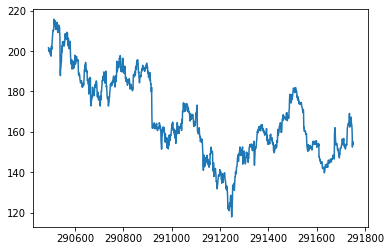

In [29]:
ibm_df["close"].plot()

In [30]:
date_min = df["date"].min()
date_max = df["date"].max()

print(date_min, date_max)

2013-02-08 00:00:00 2018-02-07 00:00:00


In [31]:
dates = pd.date_range(date_min, date_max)

In [32]:
dates

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [33]:
close_prices = pd.DataFrame(index=dates)

In [34]:
close_prices.head()

""
2013-02-08
2013-02-09
2013-02-10
2013-02-11
2013-02-12


In [35]:
symbols = df['Name'].unique()

In [36]:
# df2 = pd.DataFrame(data=ibm_df["close"].to_numpy(), index=ibm_df["date"],columns=["IBM"])
# df3 = pd.DataFrame(data=df[df["Name"]=="AAL"]["close"].to_numpy(), index=df[df["Name"]=="AAL"]["date"],columns=["AAL"])
# df2

In [37]:
close_prices = new_joined_df_cretor(df,symbols)

In [38]:
close_prices.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [39]:
# close_prices["AAL"]

In [40]:
close_prices.to_csv("sp500_close.csv")

In [41]:
# !head sp500_close.csv

In [42]:
close2 = pd.read_csv("sp500_close.csv", index_col=0, parse_dates=True)
close2.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
